In [121]:
import os

import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn import preprocessing


In [122]:
os.getcwd()

'/mnt/c/Users/Anand/home/absa/sips/sips/gym_sip'

In [123]:
directory = "/mnt/c/Users/Anand/home/Programming/datasets/price-volume-data-for-all-us-stocks-etfs/Data/Stocks/"
files = os.listdir(directory)
df = pd.read_csv(directory + files[0]) 

In [129]:
class FileLoader:
    def __init__(self):
        

raw = df.iloc[:, 1:6]

x = raw.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data = x_scaled
data_len = len(raw)

In [130]:
class LSTMLoader(Dataset):
    def __init__(self, data):
        self.samples = []
        self.length = tups_len
        self.window_len = 1
        self.data = data
        self.get_data()

    def get_data(self):
        for i in range(1, self.length - (self.window_len + 1)):
            upper_idx = i + self.window_len
            x = torch.tensor(self.data[i - 1:upper_idx - 1, :]).view(1, 1, -1).float()
            y = torch.tensor(self.data[upper_idx, :]).view(1, 1, -1).float()
            self.samples.append((x, y))
            
    def __len__(self):
        return self.length
    
    def __getitem__(self, index):
        return self.samples[index]

In [131]:
dataset = LSTMLoader(data)
data_loader = DataLoader(dataset, batch_size=1, shuffle=False)
sample_x, sample_y = dataset[0]
print(f'sample_x shape: {sample_x.shape}, sample_y shape: {sample_y.shape}')

sample_x shape: torch.Size([1, 1, 5]), sample_y shape: torch.Size([1, 1, 5])


In [132]:
lstm = nn.LSTM(5, 5)

In [133]:
# Here we define our model as a class
class LSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=1):
        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))
        return y_pred.view(-1)

model = LSTM(5, 10, batch_size=1, output_dim=5, num_layers=1)
        

In [134]:
loss_fn = torch.nn.MSELoss(size_average=False)

optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)

#####################
# Train model
#####################
num_epochs = 5

hist = np.zeros(num_epochs * len(dataset))

for t in range(num_epochs):
    # Clear stored gradient
    model.hidden = model.init_hidden()
    
    for i, (x, y) in enumerate(data_loader):
        model.zero_grad()

        # Initialise hidden state
        # Don't do this if you want your LSTM to be stateful


        # Forward pass
        y_pred = model(x)

        loss = loss_fn(y_pred, y)
        if t % 100 == 0:
            print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()

        # Zero out gradient, else they will accumulate between epochs
        optimiser.zero_grad()

        # Backward pass
        loss.backward()

        # Update parameters
        optimiser.step()

/home/sippycups/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
/home/sippycups/.local/lib/python3.6/site-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([1, 1, 1, 5])) that is different to the input size (torch.Size([5])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch  0 MSE:  0.3824782073497772
Epoch  0 MSE:  0.4014908969402313
Epoch  0 MSE:  0.3894354999065399
Epoch  0 MSE:  0.4004885256290436
Epoch  0 MSE:  0.3870135247707367
Epoch  0 MSE:  0.3898712694644928
Epoch  0 MSE:  0.39252546429634094
Epoch  0 MSE:  0.4016192555427551
Epoch  0 MSE:  0.4103359282016754
Epoch  0 MSE:  0.4135437309741974
Epoch  0 MSE:  0.40559902787208557
Epoch  0 MSE:  0.40329688787460327
Epoch  0 MSE:  0.4007870554924011
Epoch  0 MSE:  0.395698219537735
Epoch  0 MSE:  0.38247963786125183
Epoch  0 MSE:  0.3657101094722748
Epoch  0 MSE:  0.34087568521499634
Epoch  0 MSE:  0.3350471556186676
Epoch  0 MSE:  0.37438827753067017
Epoch  0 MSE:  0.37664273381233215
Epoch  0 MSE:  0.3721924424171448
Epoch  0 MSE:  0.3697677552700043
Epoch  0 MSE:  0.374679833650589
Epoch  0 MSE:  0.39656227827072144
Epoch  0 MSE:  0.4513850808143616
Epoch  0 MSE:  0.6161834597587585
Epoch  0 MSE:  0.8140882849693298
Epoch  0 MSE:  0.8380646109580994
Epoch  0 MSE:  0.7288804650306702
Epoch  0

Epoch  0 MSE:  0.00993378460407257
Epoch  0 MSE:  0.010977563448250294
Epoch  0 MSE:  0.010944465175271034
Epoch  0 MSE:  0.014492777176201344
Epoch  0 MSE:  0.024136710911989212
Epoch  0 MSE:  0.029560385271906853
Epoch  0 MSE:  0.017156289890408516
Epoch  0 MSE:  0.012601551599800587
Epoch  0 MSE:  0.014693186618387699
Epoch  0 MSE:  0.009821276180446148
Epoch  0 MSE:  0.005964810028672218
Epoch  0 MSE:  0.011586983688175678
Epoch  0 MSE:  0.0023069698363542557
Epoch  0 MSE:  0.0025421653408557177
Epoch  0 MSE:  0.0012656881008297205
Epoch  0 MSE:  0.0008174446993507445
Epoch  0 MSE:  0.0008607098134234548
Epoch  0 MSE:  0.0006710889283567667
Epoch  0 MSE:  0.0010700300335884094
Epoch  0 MSE:  0.0006059042061679065
Epoch  0 MSE:  0.0021243973169475794
Epoch  0 MSE:  0.002053941832855344
Epoch  0 MSE:  0.0009359991527162492
Epoch  0 MSE:  0.008220567367970943
Epoch  0 MSE:  0.009119952097535133
Epoch  0 MSE:  0.006408394314348698
Epoch  0 MSE:  0.0074218278750777245
Epoch  0 MSE:  0.0

Epoch  0 MSE:  0.004479262512177229
Epoch  0 MSE:  0.0041584731079638
Epoch  0 MSE:  0.003472028998658061
Epoch  0 MSE:  0.002121368423104286
Epoch  0 MSE:  0.002158441813662648
Epoch  0 MSE:  0.0023342494387179613
Epoch  0 MSE:  0.0016208845190703869
Epoch  0 MSE:  0.002433570334687829
Epoch  0 MSE:  0.003495729062706232
Epoch  0 MSE:  0.003305867314338684
Epoch  0 MSE:  0.0031270356848835945
Epoch  0 MSE:  0.0022455223370343447
Epoch  0 MSE:  0.0010225679725408554
Epoch  0 MSE:  0.0003961103211622685
Epoch  0 MSE:  0.0006707200082018971
Epoch  0 MSE:  0.0005762257496826351
Epoch  0 MSE:  0.0009358735987916589
Epoch  0 MSE:  0.0007958955247886479
Epoch  0 MSE:  0.0006755549111403525
Epoch  0 MSE:  0.0002459445677231997
Epoch  0 MSE:  0.0003605168021749705
Epoch  0 MSE:  0.022926118224859238
Epoch  0 MSE:  0.029586197808384895
Epoch  0 MSE:  0.031337544322013855
Epoch  0 MSE:  0.00946961808949709
Epoch  0 MSE:  0.0007448921678587794
Epoch  0 MSE:  0.004298360552638769
Epoch  0 MSE:  0.

Epoch  0 MSE:  0.006974367890506983
Epoch  0 MSE:  0.006318335421383381
Epoch  0 MSE:  0.006891333498060703
Epoch  0 MSE:  0.009569142945110798
Epoch  0 MSE:  0.007648369297385216
Epoch  0 MSE:  0.007512225769460201
Epoch  0 MSE:  0.005517491605132818
Epoch  0 MSE:  0.005261564627289772
Epoch  0 MSE:  0.004205473233014345
Epoch  0 MSE:  0.004020160995423794
Epoch  0 MSE:  0.0036977462004870176
Epoch  0 MSE:  0.003437560051679611
Epoch  0 MSE:  0.003612580243498087
Epoch  0 MSE:  0.002261333866044879
Epoch  0 MSE:  0.0022495663724839687
Epoch  0 MSE:  0.0019064315129071474
Epoch  0 MSE:  0.0017955029616132379
Epoch  0 MSE:  0.0015158718451857567
Epoch  0 MSE:  0.000689932843670249
Epoch  0 MSE:  0.0010664074216037989
Epoch  0 MSE:  0.0003580308984965086
Epoch  0 MSE:  0.0010841992916539311
Epoch  0 MSE:  0.0012160612968727946
Epoch  0 MSE:  0.0010181941324844956
Epoch  0 MSE:  0.0010888430988416076
Epoch  0 MSE:  0.001901176874525845
Epoch  0 MSE:  0.0013121044030413032
Epoch  0 MSE:  0

Epoch  0 MSE:  0.001744283945299685
Epoch  0 MSE:  0.0018256695475429296
Epoch  0 MSE:  0.001283366116695106
Epoch  0 MSE:  0.0011931095505133271
Epoch  0 MSE:  0.0009445833275094628
Epoch  0 MSE:  0.0018194873118773103
Epoch  0 MSE:  0.0011153225786983967
Epoch  0 MSE:  0.001180945080704987
Epoch  0 MSE:  0.0008059936226345599
Epoch  0 MSE:  0.00012474475079216063
Epoch  0 MSE:  0.00023354658333119005
Epoch  0 MSE:  0.0003156913153361529
Epoch  0 MSE:  0.00037043410702608526
Epoch  0 MSE:  0.00013781231245957315
Epoch  0 MSE:  0.00023338459141086787
Epoch  0 MSE:  0.0007180239190347493
Epoch  0 MSE:  0.0009139872272498906
Epoch  0 MSE:  0.0001147876464528963
Epoch  0 MSE:  0.00029070599703118205
Epoch  0 MSE:  0.0003783202264457941
Epoch  0 MSE:  0.0008023105328902602
Epoch  0 MSE:  0.0007423515198752284
Epoch  0 MSE:  0.0005299054901115596
Epoch  0 MSE:  0.00038618993130512536
Epoch  0 MSE:  0.0003996943705715239
Epoch  0 MSE:  0.00022504778462462127
Epoch  0 MSE:  0.0006377734243869

Epoch  0 MSE:  0.0032663375604897738
Epoch  0 MSE:  0.012063445523381233
Epoch  0 MSE:  0.012243032455444336
Epoch  0 MSE:  0.0040593016892671585
Epoch  0 MSE:  0.002861364744603634
Epoch  0 MSE:  0.002022149506956339
Epoch  0 MSE:  0.0019177638459950686
Epoch  0 MSE:  0.00219174986705184
Epoch  0 MSE:  0.0016083496157079935
Epoch  0 MSE:  0.0019185675773769617
Epoch  0 MSE:  0.0014509031316265464
Epoch  0 MSE:  0.0012840102426707745
Epoch  0 MSE:  0.002098310738801956
Epoch  0 MSE:  0.001622130163013935
Epoch  0 MSE:  0.0047122943215072155
Epoch  0 MSE:  0.0019797594286501408
Epoch  0 MSE:  0.0019431395921856165
Epoch  0 MSE:  0.0018679752247408032
Epoch  0 MSE:  0.0014877006178721786
Epoch  0 MSE:  0.002017126651480794
Epoch  0 MSE:  0.0011529694311320782
Epoch  0 MSE:  0.0032657328993082047
Epoch  0 MSE:  0.00010467404354130849
Epoch  0 MSE:  0.000532301957719028
Epoch  0 MSE:  0.0006817048997618258
Epoch  0 MSE:  0.0008083333959802985
Epoch  0 MSE:  5.944687291048467e-05
Epoch  0 M

Epoch  0 MSE:  0.0008431137539446354
Epoch  0 MSE:  0.0006501024472527206
Epoch  0 MSE:  0.0005540740094147623
Epoch  0 MSE:  0.0006132844719104469
Epoch  0 MSE:  0.0007054341840557754
Epoch  0 MSE:  0.0005756745813414454
Epoch  0 MSE:  0.0005000478704459965
Epoch  0 MSE:  0.0006213026936165988
Epoch  0 MSE:  0.00043838360579684377
Epoch  0 MSE:  0.0007661954732611775
Epoch  0 MSE:  0.0011765306117013097
Epoch  0 MSE:  0.0010610301978886127
Epoch  0 MSE:  0.0007687549805268645
Epoch  0 MSE:  0.0009194380254484713
Epoch  0 MSE:  0.0007009902619756758
Epoch  0 MSE:  0.000490174163132906
Epoch  0 MSE:  0.0003222324885427952
Epoch  0 MSE:  0.00023618027626071125
Epoch  0 MSE:  0.00025919254403561354
Epoch  0 MSE:  0.00019367205095477402
Epoch  0 MSE:  0.0001251913927262649
Epoch  0 MSE:  0.00240606302395463
Epoch  0 MSE:  0.21375325322151184
Epoch  0 MSE:  0.017128748819231987
Epoch  0 MSE:  0.008228735066950321
Epoch  0 MSE:  0.008203987032175064
Epoch  0 MSE:  0.004085621330887079
Epoch 

Epoch  0 MSE:  0.0015368775930255651
Epoch  0 MSE:  0.003970374818891287
Epoch  0 MSE:  0.012995719909667969
Epoch  0 MSE:  0.004181519616395235
Epoch  0 MSE:  0.0019674815703183413
Epoch  0 MSE:  0.0011855053016915917
Epoch  0 MSE:  0.002106665400788188
Epoch  0 MSE:  0.003291316330432892
Epoch  0 MSE:  0.003095072926953435
Epoch  0 MSE:  0.0030437179375439882
Epoch  0 MSE:  0.006384497974067926
Epoch  0 MSE:  0.002113227965310216
Epoch  0 MSE:  0.0026907355058938265
Epoch  0 MSE:  0.002968017477542162
Epoch  0 MSE:  0.0018630237318575382
Epoch  0 MSE:  0.001083865761756897
Epoch  0 MSE:  0.003421229775995016
Epoch  0 MSE:  0.0013599959202110767
Epoch  0 MSE:  0.002301329979673028
Epoch  0 MSE:  0.0021235605236142874
Epoch  0 MSE:  0.0022867699153721333
Epoch  0 MSE:  0.0036018844693899155
Epoch  0 MSE:  0.010092978365719318
Epoch  0 MSE:  0.003644319949671626
Epoch  0 MSE:  0.0033818373922258615
Epoch  0 MSE:  0.0025541135109961033
Epoch  0 MSE:  0.002497464884072542
Epoch  0 MSE:  0

Epoch  0 MSE:  0.0005282280617393553
Epoch  0 MSE:  0.01624324917793274
Epoch  0 MSE:  0.0010643101995810866
Epoch  0 MSE:  0.0008171111112460494
Epoch  0 MSE:  0.0008910681353881955
Epoch  0 MSE:  0.00107008614577353
Epoch  0 MSE:  0.001629750244319439
Epoch  0 MSE:  0.001372275990433991
Epoch  0 MSE:  0.0005477869417518377
Epoch  0 MSE:  0.0005276876618154347
Epoch  0 MSE:  0.001220728736370802
Epoch  0 MSE:  0.0011982598807662725
Epoch  0 MSE:  0.0008928427705541253
Epoch  0 MSE:  0.0011184808099642396
Epoch  0 MSE:  0.0015113031258806586
Epoch  0 MSE:  0.0010007073869928718
Epoch  0 MSE:  0.0007108019199222326
Epoch  0 MSE:  0.0002265289076603949
Epoch  0 MSE:  7.688182085985318e-05
Epoch  0 MSE:  0.0011138798436149955
Epoch  0 MSE:  0.000331592105794698
Epoch  0 MSE:  0.0004959763609804213
Epoch  0 MSE:  0.0010937780607491732
Epoch  0 MSE:  0.0002880087704397738
Epoch  0 MSE:  0.0004870847915299237
Epoch  0 MSE:  0.0008619817090220749
Epoch  0 MSE:  0.0005063693970441818
Epoch  0 

Epoch  0 MSE:  0.0005064675933681428
Epoch  0 MSE:  0.0004067528061568737
Epoch  0 MSE:  0.0010343625908717513
Epoch  0 MSE:  0.0015621886122971773
Epoch  0 MSE:  0.0016172175528481603
Epoch  0 MSE:  0.000994661240838468
Epoch  0 MSE:  0.000933282426558435
Epoch  0 MSE:  0.00015957478899508715
Epoch  0 MSE:  0.0003511297982186079
Epoch  0 MSE:  0.0008540335693396628
Epoch  0 MSE:  0.0024371256586164236
Epoch  0 MSE:  0.0001509329304099083
Epoch  0 MSE:  0.00017376241157762706
Epoch  0 MSE:  0.00014058088709134609
Epoch  0 MSE:  0.00021742460376117378
Epoch  0 MSE:  0.00034699562820605934
Epoch  0 MSE:  6.042455424903892e-05
Epoch  0 MSE:  0.0002375189505983144
Epoch  0 MSE:  0.00026771798729896545
Epoch  0 MSE:  0.0001675700186751783
Epoch  0 MSE:  0.00024785130517557263
Epoch  0 MSE:  0.0005360040231607854
Epoch  0 MSE:  0.0005934455548413098
Epoch  0 MSE:  0.0013197974767535925
Epoch  0 MSE:  0.0005889934836886823
Epoch  0 MSE:  0.0003309418389108032
Epoch  0 MSE:  0.0010189126478508

Epoch  0 MSE:  0.0027237909380346537
Epoch  0 MSE:  0.0034791852813214064
Epoch  0 MSE:  0.00233214208856225
Epoch  0 MSE:  0.0005510490154847503
Epoch  0 MSE:  0.0013819151790812612
Epoch  0 MSE:  0.00011008001456502825
Epoch  0 MSE:  0.0001269261265406385
Epoch  0 MSE:  0.001438751583918929
Epoch  0 MSE:  0.0011881986865773797
Epoch  0 MSE:  0.0022295613307505846
Epoch  0 MSE:  0.0009819531114771962
Epoch  0 MSE:  0.0002619091246742755
Epoch  0 MSE:  0.0003386658208910376
Epoch  0 MSE:  0.00029183339211158454
Epoch  0 MSE:  0.0006004178430885077
Epoch  0 MSE:  0.001157892867922783
Epoch  0 MSE:  0.0005902140983380377
Epoch  0 MSE:  0.00022332961088977754
Epoch  0 MSE:  0.00043505814392119646
Epoch  0 MSE:  0.0009749224991537631
Epoch  0 MSE:  0.000971388362813741
Epoch  0 MSE:  0.0018311187159270048
Epoch  0 MSE:  0.0012467586202546954
Epoch  0 MSE:  0.0023550100158900023
Epoch  0 MSE:  0.0008801110088825226
Epoch  0 MSE:  0.000879417231772095
Epoch  0 MSE:  0.0005150733632035553
Epo

Epoch  0 MSE:  0.001292007160373032
Epoch  0 MSE:  0.0011414551408961415
Epoch  0 MSE:  0.001243454054929316
Epoch  0 MSE:  0.0019339268328621984
Epoch  0 MSE:  0.007825693115592003
Epoch  0 MSE:  0.0019351182272657752
Epoch  0 MSE:  0.00020704833150375634
Epoch  0 MSE:  0.0005655561690218747
Epoch  0 MSE:  0.0016304029850289226
Epoch  0 MSE:  0.012066186405718327
Epoch  0 MSE:  0.0007682630675844848
Epoch  0 MSE:  7.578125223517418e-05
Epoch  0 MSE:  0.0009174893493764102
Epoch  0 MSE:  0.0004070256545674056
Epoch  0 MSE:  0.0005511745112016797
Epoch  0 MSE:  0.0003280757227912545
Epoch  0 MSE:  0.0006559871253557503
Epoch  0 MSE:  0.0002046351000899449
Epoch  0 MSE:  0.0003835392708424479
Epoch  0 MSE:  0.000670623907353729
Epoch  0 MSE:  0.0008456807699985802
Epoch  0 MSE:  0.0010652458295226097
Epoch  0 MSE:  0.0007097609923221171
Epoch  0 MSE:  0.002297867788001895
Epoch  0 MSE:  0.0016345514450222254
Epoch  0 MSE:  0.0015198983019217849
Epoch  0 MSE:  0.0014918551314622164
Epoch 

Epoch  0 MSE:  0.003087308257818222
Epoch  0 MSE:  0.002937978133559227
Epoch  0 MSE:  0.001054461463354528
Epoch  0 MSE:  0.0008874188060872257
Epoch  0 MSE:  0.00043054771958850324
Epoch  0 MSE:  0.00036996317794546485
Epoch  0 MSE:  0.0005517806857824326
Epoch  0 MSE:  0.0004751332744490355
Epoch  0 MSE:  0.0009235703619197011
Epoch  0 MSE:  0.0013888721587136388
Epoch  0 MSE:  0.001931838458403945
Epoch  0 MSE:  0.001031519495882094
Epoch  0 MSE:  0.0010440750047564507
Epoch  0 MSE:  0.001554948161356151
Epoch  0 MSE:  0.0015383691061288118
Epoch  0 MSE:  7.13891422492452e-05
Epoch  0 MSE:  0.0006902568275108933
Epoch  0 MSE:  5.970620986772701e-05
Epoch  0 MSE:  0.0003899265720974654
Epoch  0 MSE:  1.9229721146984957e-05
Epoch  0 MSE:  0.000439834053395316
Epoch  0 MSE:  0.0005408969591371715
Epoch  0 MSE:  9.189121192321181e-05
Epoch  0 MSE:  0.0006906717899255455
Epoch  0 MSE:  0.0008859165827743709
Epoch  0 MSE:  0.0021560739260166883
Epoch  0 MSE:  0.0013355747796595097
Epoch 

Epoch  0 MSE:  0.0010329009965062141
Epoch  0 MSE:  0.0007793477852828801
Epoch  0 MSE:  0.0021051964722573757
Epoch  0 MSE:  0.0013601290993392467
Epoch  0 MSE:  0.002259142929688096
Epoch  0 MSE:  0.0025670479517430067
Epoch  0 MSE:  0.001738624065183103
Epoch  0 MSE:  0.0013451564591377974
Epoch  0 MSE:  0.0012903863098472357
Epoch  0 MSE:  0.0005211848765611649
Epoch  0 MSE:  0.0008500582189299166
Epoch  0 MSE:  0.0017436281777918339
Epoch  0 MSE:  0.0022170720621943474
Epoch  0 MSE:  0.0019573005847632885
Epoch  0 MSE:  0.0011880240635946393
Epoch  0 MSE:  0.00098092679399997
Epoch  0 MSE:  0.001550420536659658
Epoch  0 MSE:  0.00027549455990083516
Epoch  0 MSE:  0.0002479148388374597
Epoch  0 MSE:  0.0023258731234818697
Epoch  0 MSE:  0.000894978700671345
Epoch  0 MSE:  0.001471188385039568
Epoch  0 MSE:  0.002531789243221283
Epoch  0 MSE:  0.0021346185822039843
Epoch  0 MSE:  0.0022426678333431482
Epoch  0 MSE:  0.0021921228617429733
Epoch  0 MSE:  0.0039785862900316715
Epoch  0

Epoch  0 MSE:  0.00016508698172401637
Epoch  0 MSE:  0.00017122403369285166
Epoch  0 MSE:  0.0002342855732422322
Epoch  0 MSE:  0.0005486284499056637
Epoch  0 MSE:  0.0014626368647441268
Epoch  0 MSE:  0.0010642092674970627
Epoch  0 MSE:  0.0015191166894510388
Epoch  0 MSE:  0.0005043941782787442
Epoch  0 MSE:  0.0004855890292674303
Epoch  0 MSE:  0.00036048286710865796
Epoch  0 MSE:  0.0005470316391438246
Epoch  0 MSE:  0.0011439077788963914
Epoch  0 MSE:  0.004577698186039925
Epoch  0 MSE:  0.0012676994083449244
Epoch  0 MSE:  0.001621189876459539
Epoch  0 MSE:  0.001211057067848742
Epoch  0 MSE:  0.0022045616060495377
Epoch  0 MSE:  0.001852052053436637
Epoch  0 MSE:  0.0010871044360101223
Epoch  0 MSE:  0.0010726297041401267
Epoch  0 MSE:  0.004508152604103088
Epoch  0 MSE:  0.0015722692478448153
Epoch  0 MSE:  0.001872262917459011
Epoch  0 MSE:  0.001129917916841805
Epoch  0 MSE:  0.00023255129053723067
Epoch  0 MSE:  0.004297792445868254
Epoch  0 MSE:  0.0009133802377618849
Epoch

Epoch  0 MSE:  0.00037687935400754213
Epoch  0 MSE:  0.0007704761810600758
Epoch  0 MSE:  0.0005377545603550971
Epoch  0 MSE:  0.0006104097701609135
Epoch  0 MSE:  0.0009108491940423846
Epoch  0 MSE:  0.00036161087336950004
Epoch  0 MSE:  0.00013148810830898583
Epoch  0 MSE:  1.9070928829023615e-05
Epoch  0 MSE:  3.4838907595258206e-05
Epoch  0 MSE:  0.0002443365810904652
Epoch  0 MSE:  0.03993821516633034
Epoch  0 MSE:  0.0036258886102586985
Epoch  0 MSE:  0.0005627006175927818
Epoch  0 MSE:  0.0005581488949246705
Epoch  0 MSE:  0.0008047495502978563
Epoch  0 MSE:  0.000824501970782876
Epoch  0 MSE:  0.0005906642763875425
Epoch  0 MSE:  0.0005231202812865376
Epoch  0 MSE:  0.0012208843836560845
Epoch  0 MSE:  0.0016096577746793628
Epoch  0 MSE:  0.0006918060826137662
Epoch  0 MSE:  7.575282779725967e-06
Epoch  0 MSE:  5.392375896917656e-05
Epoch  0 MSE:  0.0002811396843753755
Epoch  0 MSE:  0.00046864632167853415
Epoch  0 MSE:  0.000643120554741472
Epoch  0 MSE:  0.0004138235817663371

Epoch  0 MSE:  0.006382220424711704
Epoch  0 MSE:  0.0019913986325263977
Epoch  0 MSE:  0.004105963744223118
Epoch  0 MSE:  0.007087205536663532
Epoch  0 MSE:  0.007462925743311644
Epoch  0 MSE:  0.0019003364723175764
Epoch  0 MSE:  0.004041692242026329
Epoch  0 MSE:  0.00016361198504455388
Epoch  0 MSE:  0.0003092845145147294
Epoch  0 MSE:  0.0004621209518518299
Epoch  0 MSE:  0.0008134638774208724
Epoch  0 MSE:  0.0013891862472519279
Epoch  0 MSE:  0.0009140425827354193
Epoch  0 MSE:  0.0013295301469042897
Epoch  0 MSE:  0.0005640055169351399
Epoch  0 MSE:  0.0013198429951444268
Epoch  0 MSE:  0.002892077201977372
Epoch  0 MSE:  0.003002700861543417
Epoch  0 MSE:  0.0022266602609306574
Epoch  0 MSE:  0.0027911721263080835
Epoch  0 MSE:  0.003245527157559991
Epoch  0 MSE:  0.00275425985455513
Epoch  0 MSE:  0.0033266968093812466
Epoch  0 MSE:  0.001999804750084877
Epoch  0 MSE:  0.002224293304607272
Epoch  0 MSE:  0.0023654657416045666
Epoch  0 MSE:  0.0008856175700202584
Epoch  0 MSE

Epoch  0 MSE:  0.0001696827675914392
Epoch  0 MSE:  4.09684689657297e-05
Epoch  0 MSE:  9.303238766733557e-05
Epoch  0 MSE:  0.00010574043699307367
Epoch  0 MSE:  3.0542101740138605e-05
Epoch  0 MSE:  0.00027299142675474286
Epoch  0 MSE:  0.00043464015470817685
Epoch  0 MSE:  2.7274239982943982e-05
Epoch  0 MSE:  0.00013821941684000194
Epoch  0 MSE:  0.0005757088074460626
Epoch  0 MSE:  0.00044179082033224404
Epoch  0 MSE:  0.0002528001496102661
Epoch  0 MSE:  0.00046117923920974135
Epoch  0 MSE:  0.0006455746479332447
Epoch  0 MSE:  0.0010332301026210189
Epoch  0 MSE:  0.0008955480880104005
Epoch  0 MSE:  0.0003444415924604982
Epoch  0 MSE:  0.00022299375268630683
Epoch  0 MSE:  0.00032211566576734185
Epoch  0 MSE:  0.00033396019716747105
Epoch  0 MSE:  0.000836420338600874
Epoch  0 MSE:  0.0004907592083327472
Epoch  0 MSE:  0.00039202108746394515
Epoch  0 MSE:  0.0007310772780328989
Epoch  0 MSE:  0.0006546802469529212
Epoch  0 MSE:  0.0005823972169309855
Epoch  0 MSE:  0.00033630261

Epoch  0 MSE:  0.00025375784025527537
Epoch  0 MSE:  1.9639819583971985e-05
Epoch  0 MSE:  8.967245776148047e-06
Epoch  0 MSE:  0.00021424780425149947
Epoch  0 MSE:  0.0007624674472026527
Epoch  0 MSE:  0.0007242090650834143
Epoch  0 MSE:  0.0035554838832467794
Epoch  0 MSE:  0.0014390165451914072
Epoch  0 MSE:  9.569359826855361e-05
Epoch  0 MSE:  6.818652764195576e-05
Epoch  0 MSE:  0.0005290391272865236
Epoch  0 MSE:  0.0003928105579689145
Epoch  0 MSE:  0.00012397368845995516
Epoch  0 MSE:  0.00017882493557408452
Epoch  0 MSE:  0.00011590969370445237
Epoch  0 MSE:  0.00019918923499062657
Epoch  0 MSE:  0.00029281782917678356
Epoch  0 MSE:  0.00019596429774537683
Epoch  0 MSE:  0.00017607826157473028
Epoch  0 MSE:  0.0001276599068660289
Epoch  0 MSE:  0.00040913454722613096
Epoch  0 MSE:  0.0009255559998564422
Epoch  0 MSE:  0.001336343470029533
Epoch  0 MSE:  0.0011432173196226358
Epoch  0 MSE:  0.000719783129170537
Epoch  0 MSE:  0.00029750572866760194
Epoch  0 MSE:  0.00030282782

Epoch  0 MSE:  0.0006403801962733269
Epoch  0 MSE:  0.00026735011488199234
Epoch  0 MSE:  0.00018943789473269135
Epoch  0 MSE:  5.2527459047269076e-05
Epoch  0 MSE:  0.00017385372484568506
Epoch  0 MSE:  0.00013572299212682992
Epoch  0 MSE:  9.537125151837245e-05
Epoch  0 MSE:  0.00026752849225886166
Epoch  0 MSE:  0.0002548729826230556
Epoch  0 MSE:  0.0006536896107718349
Epoch  0 MSE:  0.0007601008983328938
Epoch  0 MSE:  0.0012648578267544508
Epoch  0 MSE:  0.0010671184863895178
Epoch  0 MSE:  0.0008769849664531648
Epoch  0 MSE:  0.00031761950231157243
Epoch  0 MSE:  0.00021172886772546917
Epoch  0 MSE:  0.00016855313151609153
Epoch  0 MSE:  0.00017860722437035292
Epoch  0 MSE:  8.561136928619817e-05
Epoch  0 MSE:  0.00027792478795163333
Epoch  0 MSE:  0.0016667830059304833
Epoch  0 MSE:  0.0014539585681632161
Epoch  0 MSE:  0.0008263902855105698
Epoch  0 MSE:  0.0005228171357885003
Epoch  0 MSE:  0.0004706291656475514
Epoch  0 MSE:  0.0003946556826122105
Epoch  0 MSE:  0.0002108089

IndexError: list index out of range

'\nExample of using fixed coefficients (consistency across tests of different models)\n\ndata = ARData(100, coeffs=fixed_ar_coefficients[5], num_prev=5)\nplt.plot(data.y_train)\n'

torch.Size([20, 80, 1])


Epoch  0 MSE:  38.476505279541016
Epoch  100 MSE:  27.114940643310547
Epoch  200 MSE:  20.948020935058594
Epoch  300 MSE:  20.76392364501953
Epoch  400 MSE:  20.75927734375


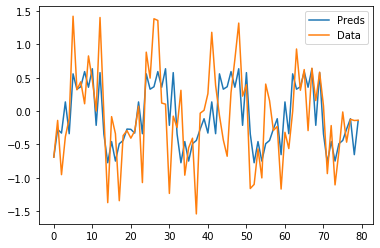

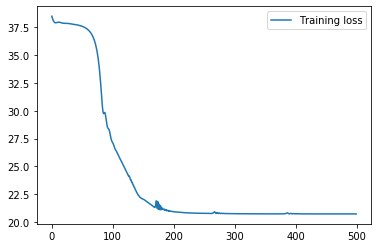

In [60]:

#####################
# Build model
#####################

# Here we define our model as a class
class LSTM(nn.Module):

    def __init__(self, input_dim, hidden_dim, batch_size, output_dim=1,
                    num_layers=2):
        super(LSTM, self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.num_layers = num_layers

        # Define the LSTM layer
        self.lstm = nn.LSTM(self.input_dim, self.hidden_dim, self.num_layers)

        # Define the output layer
        self.linear = nn.Linear(self.hidden_dim, output_dim)

    def init_hidden(self):
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers, self.batch_size, self.hidden_dim),
                torch.zeros(self.num_layers, self.batch_size, self.hidden_dim))

    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of lstm_out: [input_size, batch_size, hidden_dim]
        # shape of self.hidden: (a, b), where a and b both 
        # have shape (num_layers, batch_size, hidden_dim).
        lstm_out, self.hidden = self.lstm(input.view(len(input), self.batch_size, -1))
        
        # Only take the output from the final timetep
        # Can pass on the entirety of lstm_out to the next layer if it is a seq2seq prediction
        y_pred = self.linear(lstm_out[-1].view(self.batch_size, -1))
        return y_pred.view(-1)

model = LSTM(5, h1, batch_size=num_train, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss(size_average=False)

optimiser = torch.optim.Adam(model.parameters(), lr=learning_rate)

#####################
# Train model
#####################

hist = np.zeros(num_epochs)

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    model.hidden = model.init_hidden()
    
    # Forward pass
    y_pred = model(X_train)

    loss = loss_fn(y_pred, y_train)
    if t % 100 == 0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

#####################
# Plot preds and performance
#####################

plt.plot(y_pred.detach().numpy(), label="Preds")
plt.plot(y_train.detach().numpy(), label="Data")
plt.legend()
plt.show()

plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

Poles: [-6.21549367+0.j         -2.47920972+0.j          0.05703358+0.66590618j
  0.05703358-0.66590618j]


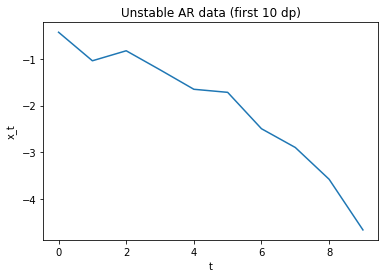

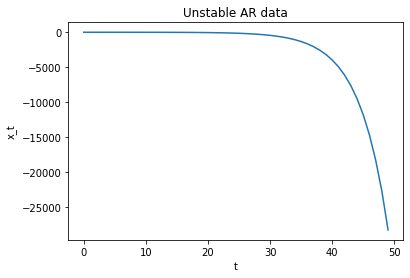

In [61]:

unstable = False
# Generate coefficients until we have at least one unstable pole
while not unstable:
    unstable_coeffs = np.random.random(5)  # 5 = 4 prev terms + 1
    # Calculate pole magnitudes
    root_magnitudes = np.abs(np.roots(unstable_coeffs))
    # check if max pole magnitude > 1 (unstable)
    if np.max(root_magnitudes) > 1:
        unstable = True
        print("Poles: {}".format(np.roots(unstable_coeffs)))

# plot unstable AR data
unstable_ar = ARData(num_datapoints=50, coeffs=unstable_coeffs, num_prev=len(unstable_coeffs), noise_var=0)

plt.plot(unstable_ar.y[:10])
plt.xlabel('t')
plt.ylabel('x_t')
plt.title("Unstable AR data (first 10 dp)")
# plt.savefig('unstable_ar_first10.jpg')
plt.show()

plt.plot(unstable_ar.y)
plt.xlabel('t')
plt.ylabel('x_t')
plt.title("Unstable AR data")
# plt.savefig('unstable_ar.jpg')
plt.show()

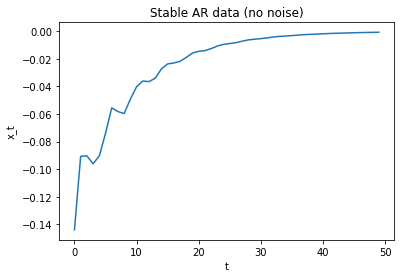

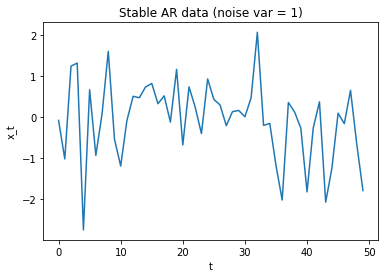

In [59]:
# Fix coefficients used so can compare plots with and without noise.
c = fixed_ar_coefficients

# Generate AR(5) with stable poles, no noise
stable_ar = ARData(num_datapoints=50, coeffs=c[5], num_prev=5, noise_var=0)

plt.plot(stable_ar.y)
plt.xlabel('t')
plt.ylabel('x_t')
plt.title("Stable AR data (no noise)")
# plt.savefig('stable_ar.jpg')
plt.show()

# Generate AR(5) with stable poles, Gaussian noise
stable_ar = ARData(num_datapoints=50, coeffs=c[5], num_prev=5, noise_var=1)

plt.plot(stable_ar.y)
plt.xlabel('t')
plt.ylabel('x_t')
plt.title("Stable AR data (noise var = 1)")
# plt.savefig('stable_ar_noisy.jpg')
plt.show()